# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [23]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows
labels = data.columns.values

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

**Answer**

PCA : List of **higher-level features** such as *healthy lifestyle*, that are linear combinations of raw features (purchases in different categories of items), which describe the dataset in a more direct way.

ICA : Trends in the data that are independent of one another (supposedly, a group of customers who buy certain combinations of products, another group of customers who buy other products, etc.)

###PCA

In [26]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=6).fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_
print [labels[np.argmax(abs(a))] for a in pca.components_]

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]
['Fresh', 'Grocery', 'Frozen', 'Frozen', 'Delicatessen', 'Detergents_Paper']


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

**Answer**

The first two components are accountable for most (~86%) of the variance in the data; I would definitely choose the first two, and possibly the third one if the first two criteria do not seem sufficient to differentiate the elements in the data set.

**3)** What do the dimensions seem to represent? How can you use this information?

**Answer**

The first dimension seems to primarily represent the purchase of *fresh products* as a driving component; the second dimension seems to represent the combination of *Milk, Groceries, and Detergents* as the second most prominent 'feature' that distinguishes the population apart.

###ICA

In [54]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA as ICA
data2 = data - np.mean(data) #whitened data
ica = ICA(n_components=6).fit(data2)
# Print the independent components
c = ica.components_
print labels
print c/np.amax(abs(c)) #to get a better sense of the numbers
print labels[np.argsort(abs(c))]

print [labels[np.argmax(a)] for a in abs(c)]

['Fresh' 'Milk' 'Grocery' 'Frozen' 'Detergents_Paper' 'Delicatessen']
[[-0.00523996  0.2343432  -0.3396913  -0.00916562  0.1695218  -0.06059089]
 [ 0.14258518 -0.03572386 -0.03250905 -0.02419917  0.08942983 -0.029169  ]
 [ 0.03078766  0.007769   -0.032304   -0.40024633  0.02248307  0.21351089]
 [-0.00886248  0.10371889  0.40492772 -0.05464132 -1.         -0.20997864]
 [-0.01228932 -0.26511701  0.06165009  0.00462887 -0.09459533  0.19950501]
 [-0.01413425 -0.01085113 -0.02567116 -0.01850949  0.02194768  0.6537009 ]]
[['Fresh' 'Frozen' 'Delicatessen' 'Detergents_Paper' 'Milk' 'Grocery']
 ['Frozen' 'Delicatessen' 'Grocery' 'Milk' 'Detergents_Paper' 'Fresh']
 ['Milk' 'Detergents_Paper' 'Fresh' 'Grocery' 'Delicatessen' 'Frozen']
 ['Fresh' 'Frozen' 'Milk' 'Delicatessen' 'Grocery' 'Detergents_Paper']
 ['Frozen' 'Fresh' 'Grocery' 'Detergents_Paper' 'Delicatessen' 'Milk']
 ['Milk' 'Fresh' 'Frozen' 'Detergents_Paper' 'Grocery' 'Delicatessen']]
['Grocery', 'Fresh', 'Frozen', 'Detergents_Paper', '

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

**Answer**

Each vector in the ICA represent how much of each of the features correspond to the newfound indepenent components -- that is, by examining the components, we are able to determine the relationship between the features in the data set.

From the resultant unmixing matrix, it can be seen that each of the resultant component vectors are based upon each of the original features -- and a general relationship in the data set can be observed. For instance, purchases of Frozen goods and Delicatessen oppose each other, as well as Detergents-Paper and Groceries. This is consistent to intuition in that the customer groups that purchse the respective categories are very different from one another.

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

**Answer**

K Means clustering is in fact a specialized form of a Gaussian Mixture Models, in that it corresponds to a case in which each of the data points must be identified with a specific cluster (i.e. one-hot encoding of the probabilities). Naturally, Gaussian Mixture Models have more parameters to work with -- but it could also provide a deeper insight into the data. For instance, by examining the probability distribution of a data point belonging to each cluster, we can determine how strongly the point associates itself with the given cluster, and how likely it is that the point is classified correctly.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [55]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [99]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation

#reduced_data = PCA(n_components=2).fit_transform(data)
pca = PCA(n_components=2).fit(data)
reduced_data = pca.transform(data)
print(labels)
print(pca.components_)

print reduced_data[:10]  # print upto 10 elements

['Fresh' 'Milk' 'Grocery' 'Frozen' 'Detergents_Paper' 'Delicatessen']
[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]]
[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [95]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

clusters_K = KMeans(n_clusters=6).fit(reduced_data)
clusters_G = GMM(n_components=6).fit(reduced_data)
print clusters

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=6, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)


In [96]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z_K = clusters_K.predict(np.c_[xx.ravel(), yy.ravel()])
Z_G = clusters_G.predict(np.c_[xx.ravel(), yy.ravel()])


In [97]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

#KMeans
centroids_K = clusters_K.cluster_centers_ 

#GMM
centroids_G = clusters_G.means_
print centroids

[[  2344.28951027  -6730.90263321]
 [ -9421.64737924  34508.91379789]
 [  7181.91424431   5413.62958366]
 [-15238.03405438  -3342.05080154]]


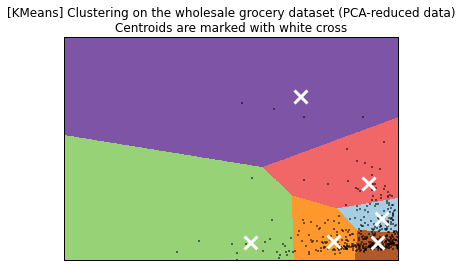

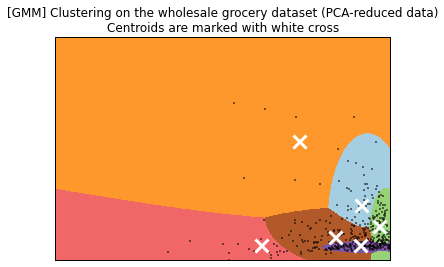

In [98]:
# Put the result into a color plot

Z_K = Z_K.reshape(xx.shape)
plt.figure()
plt.clf()

plt.imshow(Z_K, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids_K[:, 0], centroids_K[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('[KMeans] Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()

Z_G = Z_G.reshape(xx.shape)
plt.figure()
plt.clf()

plt.imshow(Z_G, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids_G[:, 0], centroids_G[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('[GMM] Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

**Answer**

The x-axis represents the first principal component, comprised of primarily *Fresh* Products (negated); the y-axis represents the second principal component, comprised of *Milk, Grocery, and Detergents/Paper*. I will refer to the second component as *Auxiliary Consumables*.

In both algorithms the centroids and the clusters were relatively consistent, with minor differences in the precise shape; from the diagram, it seems that the Gaussian Mixture Model seems to adhere closer to the clustering, so I will primarily discuss the central objects that are identified in the GMM (Bottom Diagram)

Centroid in the green region represents customers who generally do not purchase in large quantities, whose purchase of Fresh Products is relatively constant(and small), and the purchase of Auxiliary Consumables is below a certain margin (not large)

Centroid in the purple region represents customers who generally do not purchase in large quantities, whose purchase of Auxiliary Consumables is relatively constaant and the purchse of Fresh Products is below a certain margin (not large)

A similar description applies to centroids in other clusters.

### Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

**Answer**

The Gaussian Mixture Model didn't divide the data into strictly 'closest' clusters, which seemed to give an intuitively better result in classifying each data point into the best-matching cluster. This trend is most apparent when observing the bottom-right region in the second figure: whereas it is closer to the purple cluster in terms of the Euclidian distance, the vertical orientation of the green cluster better matches the data that would belong in the region.

**9)** How would you use that technique to help the company design new experiments?

**Answer**

The identified clusters provide insight into the different user groups, each with different interests; with this information, several subsamples can be extracted from each group. Among these smaller groups, the company can conduct new experiments to gauge their responses to, say, different types of delivery services: considering that these samples would identify strongly with a certain group -- and assuming the population within the group would react similarly -- the result from the experiment can then be generalized to represent a distinct group, to whom the company may formulate a more *tuned* strategy.

 **10)** How would you use that data to help you predict future customer needs?

**Answer**

Taking the delivery as an example, the different category of items each groups purchase, and the respective quantity, can be reflected into the system of providing a different type of delivery to the respective type of goods. Knowing how much, and what kind, of an item each group is interested in, the company can then allocate just appropriate amount of resources into each type of delivery -- for instance, if the group that's identified as purchasing *daily necessities* show greater interest in evening delivery services, not as much such items need to be stocked around the delivery area during the day.